## Supervised models
This notebook is intended for giving an introduction the ML supervised models that can be used for Covid detection.

For this notebook to find the new modules created for this project, we need to set its path to be in the root directory.

In [1]:
# Auto reload modules
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

<img src="../images/Supervised_Models.png" width="800"/>

## Loading packages and dependencies

In [3]:
from src.preprocessing.image_augmentor import generate_augmented_images_multiclass
from src.models.build_model import train_advanced_supervised_model, evaluate_model


# Path to the raw data and preprocessed data
raw_data_dir = '../data/raw/dataset/images'
IMG_SIZE = 299  # Resize images to IMG_SIZExIMG_SIZE pixels
batch_size = 32

## Extracting features from images

In [4]:
train_data, val_data, class_weight_dict = generate_augmented_images_multiclass(raw_data_dir, (IMG_SIZE, IMG_SIZE), batch_size)

Found 16933 images belonging to 4 classes.
Found 4232 images belonging to 4 classes.
Computed Class Weights:{0: 1.4632734185966125, 1: 0.8800935550935551, 2: 0.5191623742948246, 3: 3.9342472118959106} labels: {'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}


## Normalizing features

## Training and evaluating models

### Convolutional Neural Networks (CNN)

✅ Strengths:
* Highly accurate for image tasks.
* Learns complex patterns automatically.
* Works well with large image datasets.

❌ Weaknesses:
* Computationally expensive (needs GPUs).
* Requires large labeled datasets.
* Not easily interpretable.

In [5]:
# Train the model
cnn_model, cnn_history = train_advanced_supervised_model(train_data, val_data, IMG_SIZE, 50, 4, class_weight_dict, model_type='CNN', classification_type='categorical')

2025-03-16 19:26:40.443057: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2025-03-16 19:26:40.443088: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 128.00 GB
2025-03-16 19:26:40.443091: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 48.00 GB
2025-03-16 19:26:40.443105: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-16 19:26:40.443113: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 299, 299, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing (Resizing)             │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,077,060 (129.99 MB)

 Trainable params: 34,076,100 (129.99 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/50


/Users/rehabaam/codes/python/datascientest/project/ds_covid19_project/.ds_covid19/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2025-03-16 19:26:41.234097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


530/530 ━━━━━━━━━━━━━━━━━━━━ 66s 122ms/step - accuracy: 0.5706 - loss: 8.9165 - val_accuracy: 0.6274 - val_loss: 12.4323 - learning_rate: 1.0000e-04
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 66s 125ms/step - accuracy: 0.6952 - loss: 13.5555 - val_accuracy: 0.7105 - val_loss: 23.2990 - learning_rate: 1.0000e-04
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 396s 747ms/step - accuracy: 0.7272 - loss: 24.1837 - val_accuracy: 0.5307 - val_loss: 92.8309 - learning_rate: 1.0000e-04
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.7409 - loss: 36.6173
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
530/530 ━━━━━━━━━━━━━━━━━━━━ 213s 401ms/step - accuracy: 0.7409 - loss: 36.6274 - val_accuracy: 0.4809 - val_loss: 202.5841 - learning_rate: 1.0000e-04
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 67s 127ms/step - accuracy: 0.7643 - loss: 46.3507 - val_accuracy: 0.8712 - val_loss: 25.6756 - learning_rate: 5.0000e-05
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 66s 125ms/

In [6]:
cnn_train_loss, cnn_train_acc = cnn_history.history['loss'][-1], cnn_history.history['accuracy'][-1]
print(f"Train Accuracy: {cnn_train_acc:.4f}, Train Loss: {cnn_train_loss:.4f}")

cnn_test_loss, cnn_test_acc = evaluate_model("Multi-label classification [Normal, COVID, Viral Pneumonia, Lung_Opacity] for images without masks", cnn_model, val_data, _, model_type="CNN", classification_type="multiclass")
print(f"Test Accuracy: {cnn_test_acc:.4f}, Test Loss: {cnn_test_loss:.4f}")

Train Accuracy: 0.7756, Train Loss: 53.1030
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.6378 - loss: 11.6602
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


Registered model 'tensorflow-CNN-multiclass' already exists. Creating a new version of this model...
2025/03/16 19:41:30 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tensorflow-CNN-multiclass, version 4


🏃 View run CNN-multiclass at: http://localhost:8080/#/experiments/803656475742168625/runs/9c1ef7ef2e844776a4fe2081bb5b284c
🧪 View experiment at: http://localhost:8080/#/experiments/803656475742168625
Test Accuracy: 0.6274, Test Loss: 12.4323


Created version '4' of model 'tensorflow-CNN-multiclass'.


### Transfer learning

✅ Strengths
* Transfer learning reduces training time while maintaining high accuracy.
* Fine-tuning improves performance when sufficient data is available.
* Combining deep features with statistical features can enhance results.

In [7]:
trl_model, trl_history = train_advanced_supervised_model(train_data, val_data, IMG_SIZE, 50, 4, class_weight_dict, model_type="Transfer Learning", classification_type='categorical')

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 299, 299,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 299, 299,  │          7 │ rescaling_1[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 299, 299,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 301, 301,  │          0 │ rescaling_2[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 150, 150,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 150, 150,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 150, 150,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 150, 150,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 150, 150,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 150, 150,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 150, 150,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 150, 150,  │        512 │ block1a_se_excit

 Total params: 4,214,055 (16.08 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 66s 117ms/step - accuracy: 0.5474 - loss: 0.9748 - val_accuracy: 0.7552 - val_loss: 0.5987 - learning_rate: 1.0000e-04
Epoch 2/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 64s 121ms/step - accuracy: 0.7810 - loss: 0.4774 - val_accuracy: 0.7942 - val_loss: 0.5123 - learning_rate: 1.0000e-04
Epoch 3/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 65s 122ms/step - accuracy: 0.8211 - loss: 0.3944 - val_accuracy: 0.8329 - val_loss: 0.4286 - learning_rate: 1.0000e-04
Epoch 4/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 65s 122ms/step - accuracy: 0.8298 - loss: 0.3595 - val_accuracy: 0.8516 - val_loss: 0.3907 - learning_rate: 1.0000e-04
Epoch 5/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 62s 117ms/step - accuracy: 0.8455 - loss: 0.3291 - val_accuracy: 0.8485 - val_loss: 0.3928 - learning_rate: 1.0000e-04
Epoch 6/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 62s 117ms/step - accuracy: 0.8556 - loss: 0.3038 - val_accuracy: 0.8464 - val_loss: 0.3967 - learning_rate: 1.0000e-04
Epoch 7/50
530/530 ━━━━━━━━━━━━━━━━━━━━ 60s 11

In [8]:
trl_train_loss, trl_train_acc = trl_history.history['loss'][-1], trl_history.history['accuracy'][-1]
print(f"Train Accuracy: {trl_train_acc:.4f}, Train Loss: {trl_train_loss:.4f}")

trl_test_loss, trl_test_acc = evaluate_model("Multi-label classification [Normal, COVID, Viral Pneumonia, Lung_Opacity] for images without masks", trl_model, val_data, _, model_type="Transfer Learning", classification_type="multiclass")
print(f"Test Accuracy: {trl_test_acc:.4f}, Test Loss: {trl_test_loss:.4f}")

Train Accuracy: 0.8902, Train Loss: 0.2263
133/133 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.9025 - loss: 0.2773
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


Registered model 'tensorflow-Transfer Learning-multiclass' already exists. Creating a new version of this model...
2025/03/16 20:04:36 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: tensorflow-Transfer Learning-multiclass, version 3


🏃 View run Transfer Learning-multiclass at: http://localhost:8080/#/experiments/803656475742168625/runs/cc2cdfffffe44fa88e659b642be3dcbb
🧪 View experiment at: http://localhost:8080/#/experiments/803656475742168625
Test Accuracy: 0.8993, Test Loss: 0.2729


Created version '3' of model 'tensorflow-Transfer Learning-multiclass'.


In [9]:

# Imports for building the model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D
# Imports for image transformations
import tensorflow as tf

# Importing the image_dataset_from_directory utility from Keras
import numpy as np
# Imports for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

import os


In [10]:
class_names = list(val_data.class_indices.keys())
print(class_names)

['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']


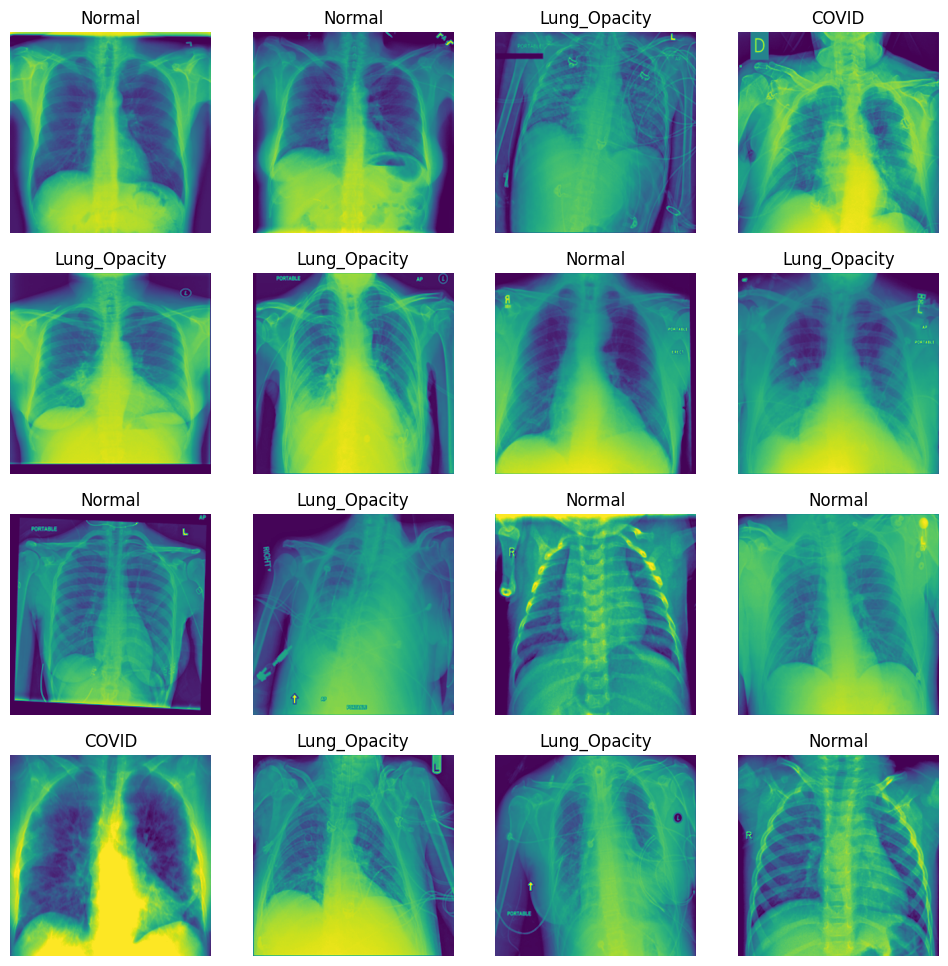

In [15]:
# To get the class names (of the fish)
class_names = list(val_data.class_indices.keys())

# Define the number of images to display
number_of_images = 16

# Create a figure for display
plt.figure(figsize=(12,12))

# Get a batch of images from val_data
images, labels = next(val_data)
# Display the images from the batch
for i in range(number_of_images):
    print()
    ax = plt.subplot(4, 4, i + 1) 
    plt.imshow(images[i].astype("uint8")) 
    plt.axis("off") 
    plt.title(f"{class_names[labels[i].argmax()]}")

# Display the images
plt.show()

In [16]:
def grad_cam(image, model, layer_name):
    # Retrieve the convolutional layer
    layer = model.get_layer(layer_name)
    
    # Create a model that generates the outputs of the convolutional layer and the predictions
    grad_model = Model(inputs=model.input, outputs=[layer.output, model.output])

    # Add a batch dimension
    image = tf.expand_dims(image, axis=0)

    # Compute the gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        predicted_class = tf.argmax(predictions[0])  # Predicted class
        loss = predictions[:, predicted_class]  # Loss for the predicted class

    # Gradients of the scores with respect to the outputs of the convolutional layer
    grads = tape.gradient(loss, conv_outputs)

    # Weighted average of the gradients for each channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weight the activations by the calculated gradients
    conv_outputs = conv_outputs[0]  # Remove the batch dimension
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    # Normalize the heatmap
    heatmap = tf.maximum(heatmap, 0)  # Focus only on positive values
    heatmap /= tf.math.reduce_max(heatmap)  # Normalize between 0 and 1
    heatmap = heatmap.numpy()  # Convert to numpy array for visualization

    # Resize the heatmap to match the original image size
    heatmap_resized = tf.image.resize(heatmap[..., np.newaxis], (image.shape[1], image.shape[2])).numpy()
    heatmap_resized = np.squeeze(heatmap_resized, axis=-1)  # Remove the singleton dimension at the end of the heatmap_resized array

    # Color the heatmap with a palette (e.g., "jet")
    heatmap_colored = plt.cm.jet(heatmap_resized)[..., :3]  # Get the R, G, B channels 

    superimposed_image = heatmap_colored * 0.7 + image[0].numpy() / 255.0

    return np.clip(superimposed_image, 0, 1), predicted_class

In [13]:
# from tensorflow.keras.models import load_model

# # Path to the saved model
# model_path = '../mlartifacts/803656475742168625/63e4a0866db443bb8c7f51c8faa57997/artifacts/CNN/data/model.keras'

# # Load the model
# loaded_model = load_model(model_path)

# # Verify the model is loaded by printing its summary
# loaded_model.summary()

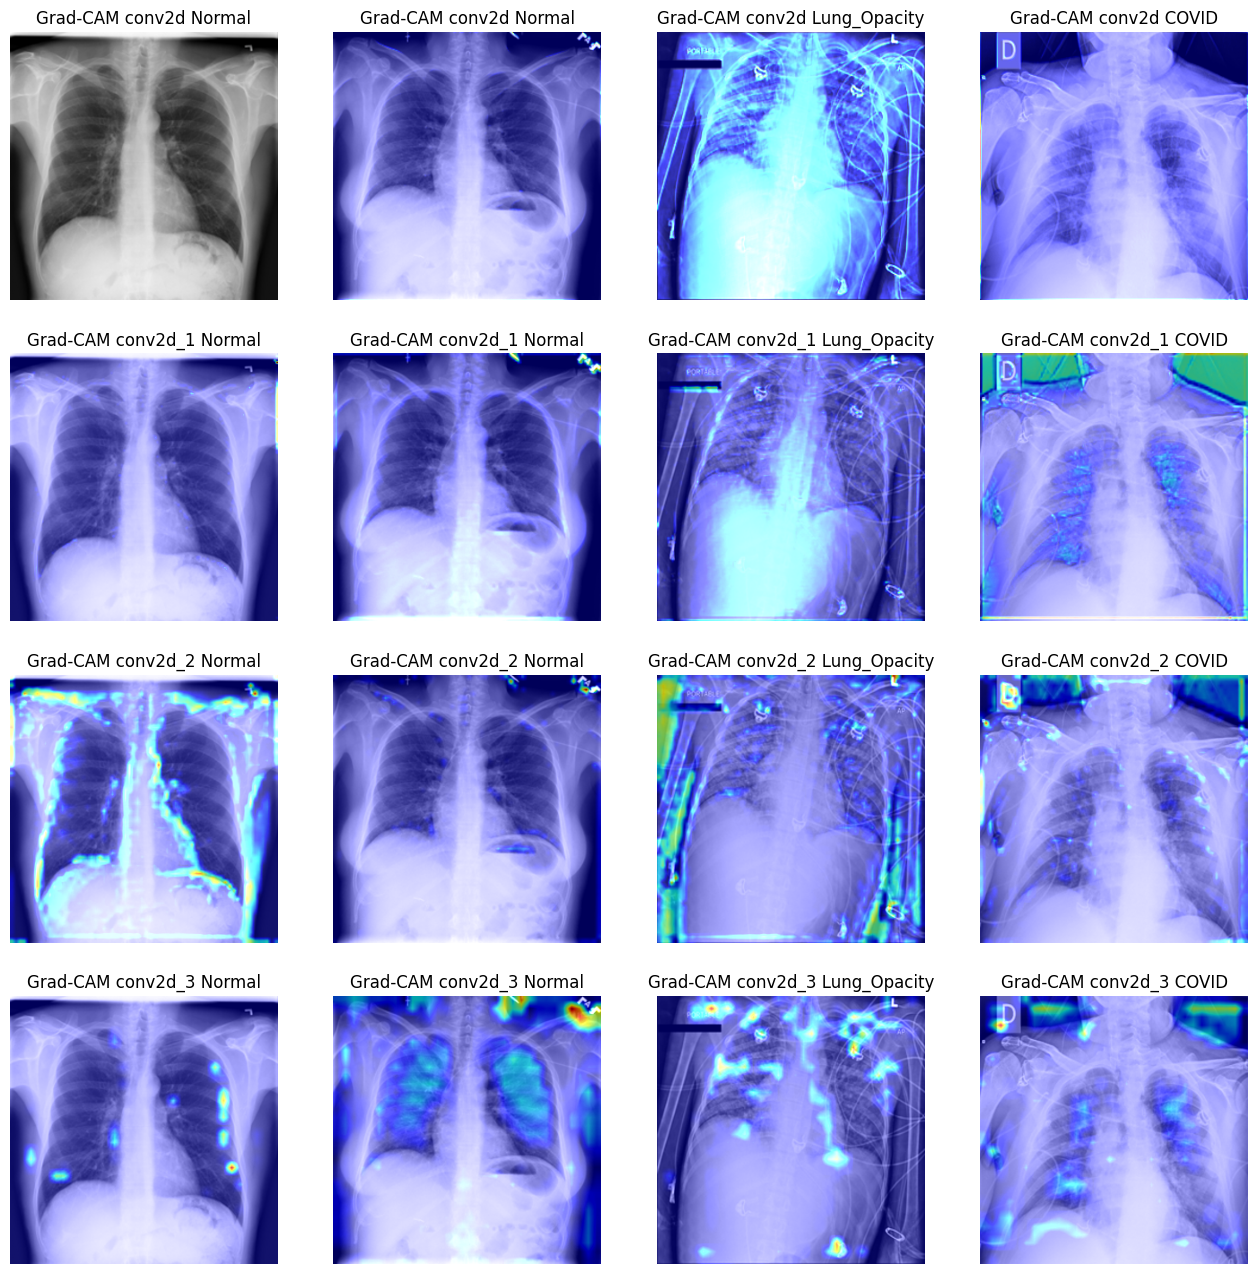

In [17]:
def show_grad_cam_cnn(images, model):
    number_of_images = images.shape[0]
    conv_layers = [layer.name for layer in model.layers if isinstance(layer, Conv2D)]

    plt.figure(figsize=(16,16))

    for j, layer in enumerate(conv_layers):

        for i in range(number_of_images):

            subplot_index = i + 1 + j * number_of_images
            plt.subplot(len(conv_layers), number_of_images, subplot_index)

            # Get the image with the overlaid heatmap
            grad_cam_image, predicted_class = grad_cam(images[i], model, layer)
            
            # Display the image with Grad-CAM
            plt.title(f'Grad-CAM {layer} {class_names[predicted_class]}')
            plt.imshow(grad_cam_image)
            plt.axis("off")

    plt.show()

show_grad_cam_cnn(images[:4], cnn_model)
# print(images[16:, :, :, :].shape)